<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/financial-fraud-detection/financial-fraud-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kaggle dataset

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp ./kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ealaxi/paysim1

In [ ]:
! unzip /content/paysim1.zip -d /content/paysim1

Archive:  /content/paysim1.zip
replace /content/paysim1/PS_20174392719_1491204439457_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


its highly imbalanced data

### Synthetic Financial Datasets For Fraud Detection

In [53]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# df = pd.read_csv('/content/paysim1/PS_20174392719_1491204439457_log.csv')
df = pd.read_csv('transactions.csv')

In [55]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1000 non-null   int64  
 1   type            1000 non-null   object 
 2   amount          1000 non-null   float64
 3   nameOrig        1000 non-null   object 
 4   oldbalanceOrg   1000 non-null   float64
 5   newbalanceOrig  1000 non-null   float64
 6   nameDest        1000 non-null   object 
 7   oldbalanceDest  1000 non-null   float64
 8   newbalanceDest  1000 non-null   float64
 9   isFraud         1000 non-null   int64  
 10  isPayment       1000 non-null   int64  
 11  isMovement      1000 non-null   int64  
 12  accountDiff     1000 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 101.7+ KB


### How many transactions are fraudulent?

In [57]:
print(df[df['isFraud']==1].count())
print(df[df['isFraud']==0].count())

step              282
type              282
amount            282
nameOrig          282
oldbalanceOrg     282
newbalanceOrig    282
nameDest          282
oldbalanceDest    282
newbalanceDest    282
isFraud           282
isPayment         282
isMovement        282
accountDiff       282
dtype: int64
step              718
type              718
amount            718
nameOrig          718
oldbalanceOrg     718
newbalanceOrig    718
nameDest          718
oldbalanceDest    718
newbalanceDest    718
isFraud           718
isPayment         718
isMovement        718
accountDiff       718
dtype: int64


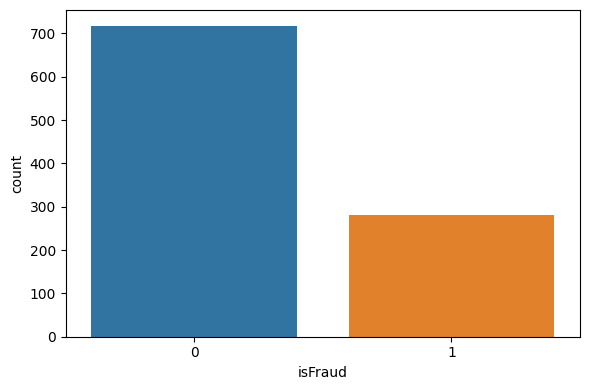

In [58]:
fig,ax = plt.subplots()
fig.set_size_inches(6,4)
ax = sns.countplot(x=df['isFraud'], data=df)
plt.tight_layout()

Dane są lil bit imbalanced !

### Calculate summary statistics for "amount" (distribution)

In [59]:
df['amount'].describe()

count    1.000000e+03
mean     5.373080e+05
std      1.423692e+06
min      0.000000e+00
25%      2.933705e+04
50%      1.265305e+05
75%      3.010378e+05
max      1.000000e+07
Name: amount, dtype: float64

In [60]:
df['type'].unique()

array(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
      dtype=object)

### Creating new col isPayment, where for PAYMENT, DEBIT x=1, else x=0

```
df[df.month.isin(['January', 'February','March'])]
```



❗ DataFrame.apply uses a Series as input

In [61]:
df['isPayment'] = 0
df['isPayment'][df['type'].isin(['PAYMENT', 'DEBIT'])]=1

<ipython-input-61-a1a67bd0416f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isPayment'][df['type'].isin(['PAYMENT', 'DEBIT'])]=1


In [62]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


### Creating col = isMovement
capture if money moved out of the origin account
- x=1 for type: CASHOUT, TRANSFER, else x=0

In [63]:
df['isMovement'] = 0
df['isMovement'][df['type'].isin(['CASH_OUT', 'TRANSFER'])]=1

<ipython-input-63-293d08d0198a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isMovement'][df['type'].isin(['CASH_OUT', 'TRANSFER'])]=1


In [64]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


W przypadku oszustw finansowych kolejnym kluczowym czynnikiem do zbadania byłaby różnica w wartości konta źródłowego i docelowego (konta docelowe o znacznie innej wartości mogą być podejrzane o oszustwo).

In [65]:
df['accountDiff'] = abs(df['oldbalanceOrg'] - df['oldbalanceDest'])

In [66]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


# Logistic Regression - Creating a predictive model to determine if a transaction is fraudulent or not

In [67]:
y = df['isFraud'].values
X = df[['amount','isPayment','isMovement','accountDiff']]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
print(model.score(X_train, y_train))

0.8371428571428572


In [72]:
print(model.score(X_test, y_test))

0.8466666666666667


In [73]:
print(model.coef_)

[[ 2.25960378 -0.62551594  2.0693282  -0.93958482]]


In [74]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 1 

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8466666666666667
ROC AUC: 0.7363636363636364

Confusion Matrix:
 [[214   6]
 [ 40  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       220
           1       0.87      0.50      0.63        80

    accuracy                           0.85       300
   macro avg       0.86      0.74      0.77       300
weighted avg       0.85      0.85      0.83       300



### Confusion matrix

In [76]:
print(confusion_matrix(y_test, y_pred))

[[214   6]
 [ 40  40]]


[TN FP] [FN TP]

TN - 205 (non_fraud = non_fraud)
<br>
TP - 35  (isfraud = isfraud)
<br>
FP - non_fraud = isfraud<br>
FN - isfraud = non_fraud

### Testing on the new transaction data

In [77]:
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 98765.43])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])
transaction4 = np.array([6472.54, 1.0, 0.0, 1.23])

In [78]:
sample_transactions = np.stack((transaction1,transaction2,transaction3,transaction4))

In [79]:
sample_transactions = scaler.transform(sample_transactions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predict fraud on the new transactions

In [80]:
print(model.predict(sample_transactions))

[0 0 0 0]


In [81]:
print(model.predict_proba(sample_transactions))

[[0.61607543 0.38392457]
 [0.99810959 0.00189041]
 [0.99640505 0.00359495]
 [0.99834035 0.00165965]]


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [83]:
y = df['isFraud'].values
X = df[['amount','isPayment','isMovement','accountDiff']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [84]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [85]:
y_pred = rf_model.predict(X_test)

In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.875
ROC AUC: 0.8472773169852146

Confusion Matrix:
 [[129  12]
 [ 13  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       141
           1       0.79      0.78      0.79        59

    accuracy                           0.88       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.87      0.88      0.87       200

